# Autoencoder — Rekonstrukcja obrazów i anomalii
## Zadanie 4 (Autoencoder): Naucz klasyczny autoencoder rekonstrukcji obrazów CIFAR-10 — CIFAR-10. 
## Dane: RGB obrazy 32×32. Normalizuj piksele do zakresu [0,1]. Oceń jakość rekonstrukcji.

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, datasets

tf.random.set_seed(42)
np.random.seed(42)


# Przygotowanie i przetwarzanie danych (CIFAR-10)
### Wczytanie zbióru danych CIFAR-10, który składa się z kolorowych obrazów o wymiarach 32x32 piksele (3 kanały RGB). Zgodnie z poleceniem, wykonana jest normalizacja wartości pikseli do zakresu [0, 1] dzieląc je przez 255.


In [13]:
# Wczytanie danych CIFAR-10
(x_train, _), (x_test, _) = datasets.cifar10.load_data()

# Normalizacja pikseli do zakresu [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Spłaszczenie danych dla warstw Dense
# Wymiar wejściowy: 32 * 32 * 3 = 3072
input_dim = 32 * 32 * 3
x_train_flat = x_train.reshape((len(x_train), input_dim))
x_test_flat = x_test.reshape((len(x_test), input_dim))

print(f"Rozmiar zbioru treningowego (oryginalny): {x_train.shape}")
print(f"Rozmiar zbioru treningowego (spłaszczony): {x_train_flat.shape}")

Rozmiar zbioru treningowego (oryginalny): (50000, 32, 32, 3)
Rozmiar zbioru treningowego (spłaszczony): (50000, 3072)


# Definicja architektury Autoencodera
### Sieć składa się z enkodera, który kompresuje dane wejściowe do ukrytej reprezentacji (`encoding_dim`), oraz dekodera, który próbuje odtworzyć oryginał. 

In [14]:
# Parametry modelu
encoding_dim = 512
hidden_dim = 256   

# 1. Koder 
input_img = layers.Input(shape=(input_dim,))
encoded = layers.Dense(hidden_dim, activation='relu')(input_img)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded) 

# 2. Dekoder 
decoded = layers.Dense(hidden_dim, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

# Złożenie modelu Autoencodera
autoencoder = models.Model(input_img, decoded)

# Wyświetlenie podsumowania modelu
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3072)           │       789,504 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,839,104 (7.02 MB)

 Trainable params: 1,839,104 (7.02 MB)

 Non-trainable params: 0 (0.00 B)

# Kompilacja i trening modelu

In [15]:
# Kompilacja modelu
autoencoder.compile(optimizer='adam', loss='mse')

# Trening modelu
history = autoencoder.fit(
    x_train_flat, x_train_flat,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_flat, x_test_flat)
)

Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0350 - val_loss: 0.0233
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0209 - val_loss: 0.0181
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0171 - val_loss: 0.0154
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0150 - val_loss: 0.0142
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0140 - val_loss: 0.0137
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0133 - val_loss: 0.0131
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0126 - val_loss: 0.0123
Epoch 8/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0122 - val_loss: 0.0118
Epoch 9/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0118 - val_loss: 0.0116
Epoch 10/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0114 - val_loss: 0.0111
Epoch 11/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0111 - val_loss: 0.0109
Epoch 12/100
196/196 ━━━━━━━━━

# Ewaluacja i wizualizacja rekonstrukcji
### Poniższy kod wyświetla zestawienie oryginalnych obrazów oraz ich rekonstrukcji wygenerowanych przez autoencoder.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Porównanie obrazów oryginalnych i zrekonstruowanych:


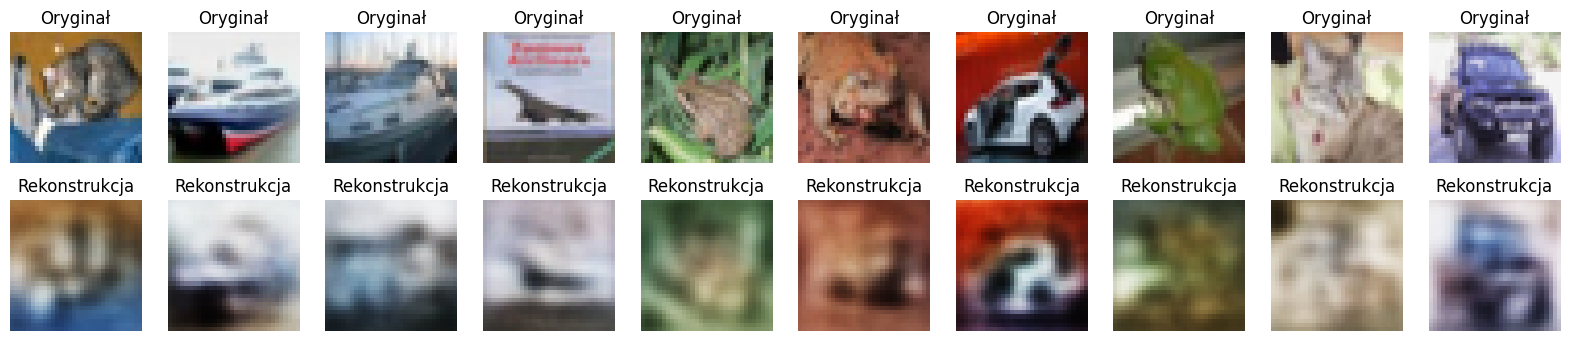

Średni błąd rekonstrukcji (MSE) na zbiorze testowym: 0.0080


In [16]:
# Wygenerowanie rekonstrukcji dla zbioru testowego
decoded_imgs_flat = autoencoder.predict(x_test_flat)

# Przywrócenie kształtu obrazów (Reshape)
decoded_imgs = decoded_imgs_flat.reshape((-1, 32, 32, 3))

# Funkcja wizualizująca
def plot_results(n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Oryginał
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i])
        plt.title("Oryginał")
        plt.axis("off")

        # Rekonstrukcja
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i])
        plt.title("Rekonstrukcja")
        plt.axis("off")
    plt.show()

print("Porównanie obrazów oryginalnych i zrekonstruowanych:")
plot_results(10)

# Ocena liczbowa (MSE na zbiorze testowym)
test_loss = autoencoder.evaluate(x_test_flat, x_test_flat, verbose=0)
print(f"Średni błąd rekonstrukcji (MSE) na zbiorze testowym: {test_loss:.4f}")